# 📊 Day 2 – Tumor Visualization (Malignant vs. Benign)

**Goal:** Perform Exploratory Data Analysis (EDA) to compare malignant and benign tumors using the cleaned Breast Cancer dataset.

We will use:
- Seaborn: for advanced visualizations
- Matplotlib: to save all plots into a single PDF report

**Dataset Used:** `data/breast_cancer.csv`


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# Set seaborn style
sns.set(style="whitegrid")


In [2]:
# Load the cleaned dataset
df = pd.read_csv('../data/breast_cancer.csv')

# Preview
df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 🎯 Diagnosis Column
- `0` = Malignant
- `1` = Benign

We will visualize how features vary between these two classes.


C:\Users\nitis\AppData\Local\Temp\ipykernel_2568\3557598530.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette=['#ff4d4d', '#4CAF50'])


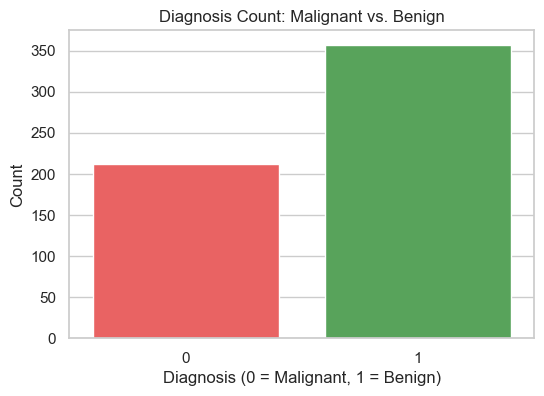

In [3]:
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df, palette=['#ff4d4d', '#4CAF50'])
plt.title("Diagnosis Count: Malignant vs. Benign")
plt.xlabel("Diagnosis (0 = Malignant, 1 = Benign)")
plt.ylabel("Count")
plt.show()


## 📊 Feature Distributions

We’ll compare distributions of important features such as:
- `radius_mean`
- `texture_mean`
- `perimeter_mean`
- `area_mean`
- `smoothness_mean`

These are biologically significant in cancer classification.


In [4]:
features_to_plot = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']

# Create PDF
with PdfPages('../outputs/diagnosis_feature_distributions.pdf') as pdf:
    for feature in features_to_plot:
        plt.figure(figsize=(7, 5))
        sns.histplot(data=df, x=feature, hue='diagnosis', kde=True, palette=['#ff4d4d', '#4CAF50'], bins=30)
        plt.title(f'{feature} Distribution by Diagnosis')
        plt.xlabel(feature)
        plt.ylabel('Count')
        pdf.savefig()
        plt.close()


## 🔍 Observations (Example Write-up)

- Malignant tumors tend to have **larger radius and perimeter** than benign ones.
- There is a clear difference in `area_mean` between the two classes.
- `smoothness_mean` shows some overlap, but with distinct density curves.

These visualizations help us understand how the model might distinguish between cancer types.

✅ PDF saved as `outputs/diagnosis_feature_distributions.pdf`
